<h1>1. Introduction to SVM</h1>

Used SVM to build and train a model using human cell records, and classify cells to whether the samples are benign (mild state) or malignant (evil state).

SVM works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable (This gets done by kernel function of SVM classifier). A separator between the categories is found, then the data is transformed in such a way that the separator could be drawn as a hyperplane.

<h2>2. Necessary imports</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h2>3. About the Cancer data</h2>

Original Author - UCI Machine Learning Repository (Asuncion and Newman, 2007)[http://archive.ics.uci.edu/ml/index.php] 

Each record contains the values of a set of cell characteristics. The fields in each record are:
|Field name|Description|
|---|---|
|ID|Identifier|
|Clump|Clump thickness|
|UnifSize|Uniformity of cell size|
|UnifShape|Uniformity of cell shape|
|MargAdh|Marginal Adhesion|
|SingEpiSize|Single epithelial cell size|
|BareNuc|Bare nuclei|
|BlandChrom|Bland chromatin|
|NormNucl|Normal nucleoli|
|Mit|Mitoses|
|Class|Benign pr malignant|

In this example, we're using a dataset that has a 10 predictors(columns) in each record, 700 records(rows).

#### row = record
#### column = attribute/dimension
#### target = prediction


<h2>4. Load Data from CSV File</h2>

In [11]:
cell_df = pd.read_csv("D:\Practicals Performed\BSC CS\SY\SEM-3\Linear-Algebra\practical 4\cell_samples.csv")
# print first 5 line head()
cell_df.head() 

# print last 5 line tail()
#cell_df.tail()

# will display how many values are there in dataset
# cell_df.shape

# size in bytes
# cell_df.size

# display columnwise count of values available in each column
# cell_df.count()

# cell_df['Class'].value_counts()

7689

<h2>5. Distribution of the classes</h2>

<AxesSubplot:xlabel='Clump', ylabel='UnifSize'>

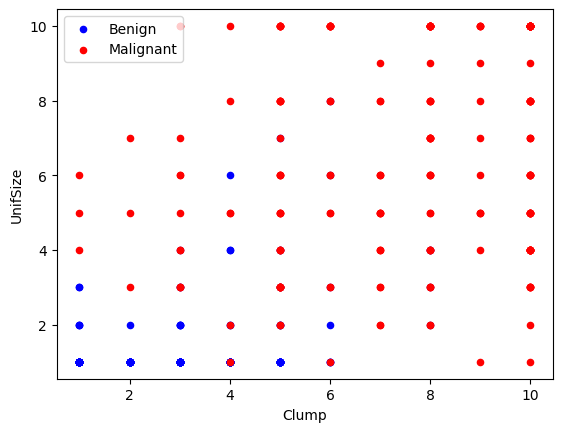

In [3]:
benign_df = cell_df[cell_df['Class']==2][0:200]
malignant_df = cell_df[cell_df['Class']==4][0:200]

#help(benign.df_plot)

axes = benign_df.plot(kind='scatter', x='Clump', y='UnifSize', color='blue', label='Benign')
malignant_df.plot(kind='scatter', x='Clump', y='UnifSize', color='red', label='Malignant', ax=axes)

<h2>6. Identifying unwanted rows</h2>

In [4]:
cell_df.dtypes

cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

<h2>7. Remove unwanted columns</h2>

In [5]:
cell_df.columns

feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

# cell_df 100 rows and 11 columns,
# picked 9 columns out of 11

# Independent var 
X = np.asarray(feature_df)

# dependent variable
y = np.asarray(cell_df['Class'])

X[0:5]

y[0:5]

array([2, 2, 2, 2, 2], dtype=int64)

<h2>8. Divide  the data as Train/Test dataset</h2>

In [6]:
'''
cell_df --> Train (80 rows)/Test (20 rows)
Train(X,y)  ## X itself is a 2D array,  ## y is 1D

'''

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# 546 x 9
X_train.shape
# 546 x 1
# y_train.shape

# 137 x 9
#X_test.shape
# 137 x 1
#y_test.shape

(546, 9)

<h2>9. Modeling (SVM with Scikit-learn)</h2>

The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the tranformation is known as the kernel function, and can be of different types, such as:
1. Linear
2. Polynomial
3. Radial basis function (RBF)
4. Sigmoid

Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset, we usually choose different functions in turn and compare the results. Let's just use the default, RBF (Radial basis function ) for this lab.

In [7]:
from sklearn import svm

'''
Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.
|
|     Current default is 'auto' which uses (1/n_features),
|     if ``gamma='scale'`` is passed then it uses 1 / (n_features * X.var())
|     as value of gamma
'''

classifier = svm.SVC(kernel='linear', gamma='auto', C=2)
classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)

<h2>10. Evaluation (Results)</h2>

In [8]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

